In [8]:
from scipy.integrate import simpson
from const import *
import ldfparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def cal_Vp(IV_df):
    V = np.array(IV_df['V'])
    I = np.array(IV_df['I'])
    dIdV = np.gradient(I, V)
    Vp = V[np.argmax(dIdV)]
    return Vp

def cal_eepf(IV_df):
    Vp = cal_Vp(IV_df)
    V = np.array(IV_df['V'])
    I = np.array(IV_df['I'])
    dI = np.gradient(I, V)
    ddI = np.gradient(dI, V)
    eepf = 2*ddI/e/Ap*np.sqrt(2*Me*abs(V-Vp)/e)/np.sqrt(abs(V-Vp))
    print(np.sqrt(abs(V-Vp)))
    return eepf

In [14]:
workDir = './211221(SF6)/SF6/B field scan_20V 0mm/test/'
parser = ldfparser.LDF(workDir)
ldf_files = parser.ldf_paths()
for file in ldf_files:
    IV, eepf, result = parser.pull_attr(file, need_return=True)
    Vp = cal_Vp(IV)
    my_eepf = cal_eepf(IV)
    print(file)
    

In [17]:
cal_Vp(IV)

4.82437

(0.0, 42.48841)

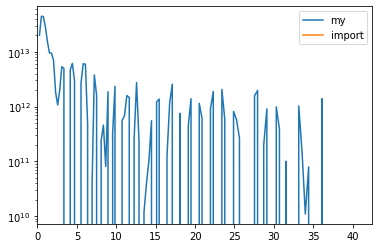

In [18]:
V = np.array(IV['V'])
I = np.array(IV['I'])
plt.plot(-V+Vp, my_eepf)
energy = eepf['eepf_energy']
import_eepf = eepf['eepf']
plt.plot(energy, import_eepf)
plt.yscale('log')
plt.legend(['my','import'])
plt.xlim(0,)

In [20]:
simpson(my_eepf, -V+Vp)

nan

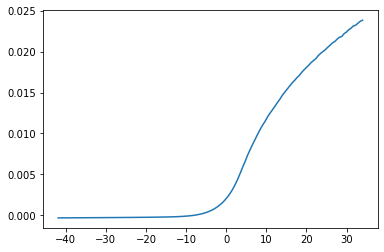

In [136]:
plt.plot(V, I)

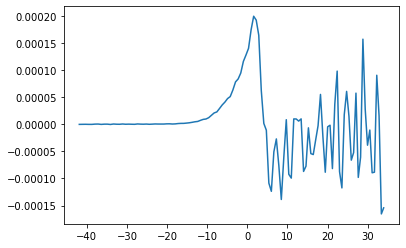

In [137]:
dI = np.gradient(I, V)
ddI = np.gradient(dI, V)
plt.plot(V,ddI)

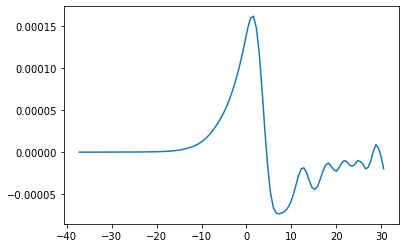

In [138]:
df = pd.read_csv('./sample.csv')
import_ddI = df['Current Second Derivative(A/V^2)']
import_V = df['Voltage (V)']
plt.plot(import_V, import_ddI)

In [146]:
def cal_eepf2():
    Vp = cal_Vp(IV)
    V = import_V
    ddI = import_ddI
    eepf = 2*ddI/e/Ap*np.sqrt(2*Me*abs(V-Vp)/e)/np.sqrt(abs(V-Vp))
    return eepf

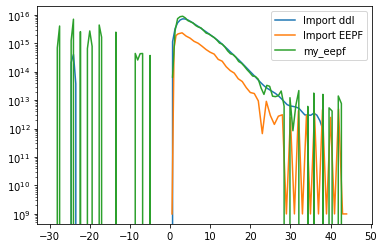

In [147]:
plt.plot(-import_V+Vp,cal_eepf2())
plt.plot(energy, import_eepf)
plt.plot(-V+Vp, my_eepf)
plt.yscale('log')
plt.legend(['Import ddI', 'Import EEPF', 'my_eepf'])
plt.show()

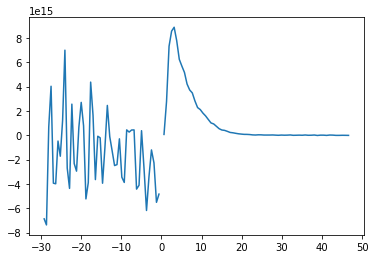

In [148]:
plt.plot(-V+Vp, my_eepf)

In [182]:
V_adj = -V+Vp
a1=V_adj[(0<V_adj) & (V_adj<20)]
a2=my_eepf[(0<V_adj) & (V_adj<20)]

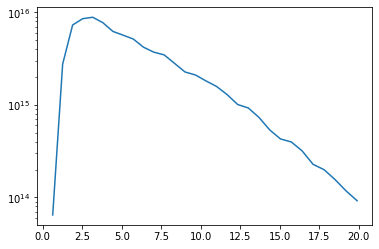

In [202]:
plt.plot(a1,a2)
plt.yscale('log')

In [203]:
a2

array([9.19459768e+13, 1.17237987e+14, 1.55437604e+14, 1.99069405e+14,
       2.27583234e+14, 3.17900931e+14, 3.97122152e+14, 4.27934011e+14,
       5.35512212e+14, 7.30589612e+14, 9.25279823e+14, 1.00914305e+15,
       1.29310326e+15, 1.58436666e+15, 1.81617456e+15, 2.10447744e+15,
       2.27032820e+15, 2.81147213e+15, 3.47432907e+15, 3.71845247e+15,
       4.20563195e+15, 5.15678195e+15, 5.67916044e+15, 6.23300716e+15,
       7.76027193e+15, 8.86886313e+15, 8.54958289e+15, 7.30963651e+15,
       2.76046983e+15, 6.45461363e+13])

array([9.19459768e+13, 1.17237987e+14, 1.55437604e+14, 1.99069405e+14,
       2.27583234e+14, 3.17900931e+14, 3.97122152e+14, 4.27934011e+14,
       5.35512212e+14, 7.30589612e+14, 9.25279823e+14, 1.00914305e+15,
       1.29310326e+15, 1.58436666e+15, 1.81617456e+15, 2.10447744e+15,
       2.27032820e+15, 2.81147213e+15, 3.47432907e+15, 3.71845247e+15,
       4.20563195e+15, 5.15678195e+15, 5.67916044e+15, 6.23300716e+15,
       7.76027193e+15, 8.86886313e+15, 8.54958289e+15, 7.30963651e+15,
       2.76046983e+15, 6.45461363e+13])

5.236225515657047e+16

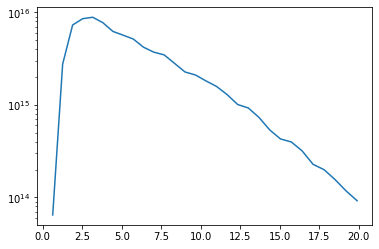

In [218]:
plt.plot(a1,a2)
plt.yscale('log')
simpson(np.flip(a2),np.flip(a1))

-1.7352315732380016e+16

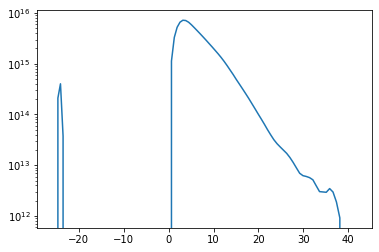

In [214]:
plt.plot(-import_V+Vp,cal_eepf2())
plt.yscale('log')
simpson(cal_eepf2(),-import_V+Vp)

1.4035950293333332e+16

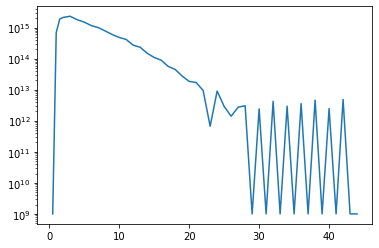

In [211]:
plt.plot(energy, import_eepf)
plt.yscale('log')
simpson(import_eepf,energy)